## 0. Environment & imports
We import all necessary libraries



In [1]:
# Data handling
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve

# For KNN
from sklearn.neighbors import KNeighborsRegressor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../assets/numerical_dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
X = df.drop('charges', axis=1)
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8]:
# encoding categorical column {'sex','smoker','region'}

# Encode binary columns
# X['sex'] = X['sex'].map({'male': 1, 'female': 0})
# X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})

# One-hot encoding for region
X = pd.get_dummies(X, columns=['region','sex', 'smoker'], drop_first=True)

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42 )

In [10]:
# Normalization the Numircal column
scaler = StandardScaler()
#num_cols = ['age', 'bmi', 'children']
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_test

array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.5723141 ,
        -1.0246016 , -0.50874702],
       [-0.23863782, -0.08946143, -0.91119211, ..., -0.5723141 ,
        -1.0246016 , -0.50874702],
       [ 1.75178229, -0.60845296, -0.91119211, ..., -0.5723141 ,
        -1.0246016 ,  1.96561348],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ..., -0.5723141 ,
         0.97598911, -0.50874702],
       [ 1.04091797,  2.78941026, -0.91119211, ..., -0.5723141 ,
        -1.0246016 ,  1.96561348],
       [ 0.82765867,  0.60252728, -0.08842793, ...,  1.74729228,
        -1.0246016 , -0.50874702]], shape=(268, 8))

In [12]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
y_pred = knn.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'mean sqyare error: {mse} \nmean aboslute error: {mae} \nr2 score: {r2} \nroot mean squared error: {rmse}')

mean sqyare error: 30459865.823198732 
mean aboslute error: 3494.746057742537 
r2 score: 0.8037995832203448 
root mean squared error: 5519.045734834848


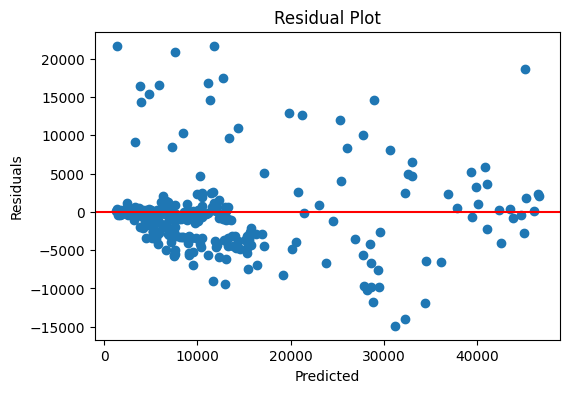

In [15]:
#Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

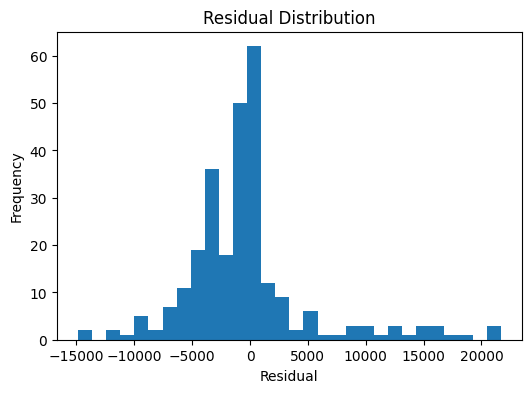

In [16]:
#Residual Distribution
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

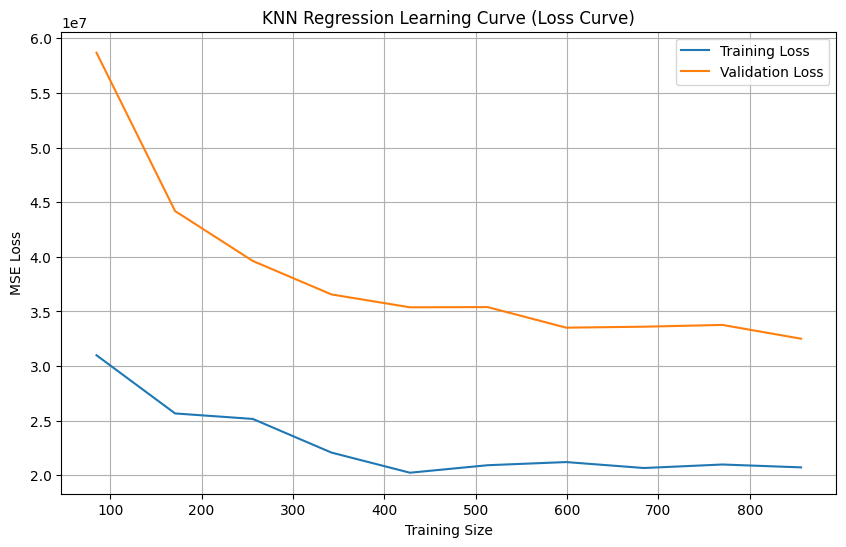

In [17]:
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_loss = -train_scores.mean(axis=1)
test_loss  = -test_scores.mean(axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_loss, label='Training Loss')
plt.plot(train_sizes, test_loss, label='Validation Loss')
plt.xlabel("Training Size")
plt.ylabel("MSE Loss")
plt.title("KNN Regression Learning Curve (Loss Curve)")
plt.legend()
plt.grid()
plt.show()

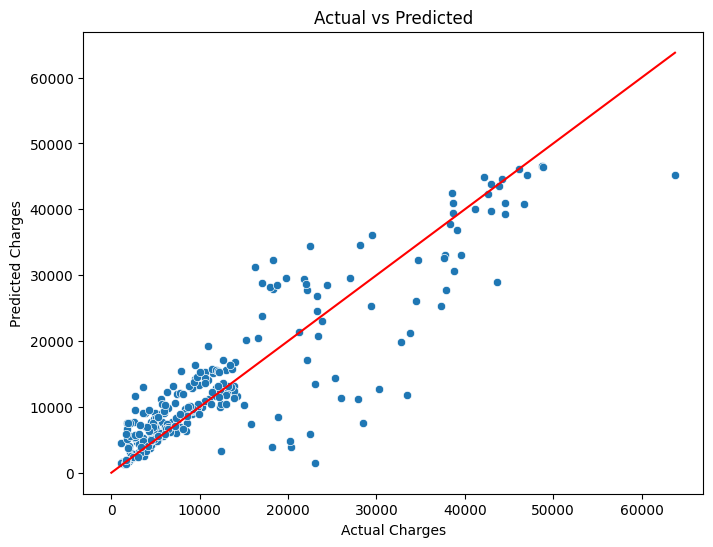

In [18]:
#  ACTUAL vs PREDICTED
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.show()